In [228]:
import cv2
import warnings
import mediapipe as mp
import os
import absl.logging
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Suppress TensorFlow, MediaPipe, and protobuf logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # 0 = all logs, 1 = info, 2 = warning, 3 = error only
absl.logging.set_verbosity(absl.logging.ERROR)
warnings.filterwarnings("ignore")

In [229]:

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
    print(results)
    break

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())

    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

I0000 00:00:1762695030.763026   45953 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1762695030.764744   56221 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: AMD Radeon Graphics (radeonsi, renoir, ACO, DRM 3.61, 6.14.0-35-generic)
W0000 00:00:1762695030.811793   56209 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762695030.845797   56211 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762695030.847681   56208 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762695030.847808   56212 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. D

<class 'mediapipe.python.solution_base.SolutionOutputs'>


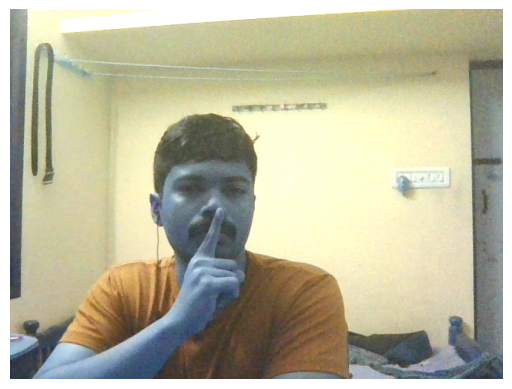

In [230]:

#image = cv2.imread(image)
image = cv2.convertScaleAbs(image, alpha=1.2, beta=25)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()



In [231]:
results.face_landmarks

landmark {
  x: 0.413044542
  y: 0.58667326
  z: -0.0239082184
}
landmark {
  x: 0.417472661
  y: 0.55294472
  z: -0.0438018627
}
landmark {
  x: 0.41462642
  y: 0.562656939
  z: -0.0241012722
}
landmark {
  x: 0.409768432
  y: 0.518011749
  z: -0.0327844173
}
landmark {
  x: 0.417989671
  y: 0.542559206
  z: -0.0462195352
}
landmark {
  x: 0.417610854
  y: 0.52856189
  z: -0.0423261188
}
landmark {
  x: 0.415824592
  y: 0.494555622
  z: -0.0190725233
}
landmark {
  x: 0.35443294
  y: 0.490101784
  z: 0.00391744403
}
landmark {
  x: 0.415954292
  y: 0.470271587
  z: -0.0120252268
}
landmark {
  x: 0.416473925
  y: 0.456721574
  z: -0.0127233509
}
landmark {
  x: 0.415904194
  y: 0.409175754
  z: -0.000912616
}
landmark {
  x: 0.412701041
  y: 0.591474056
  z: -0.0228728689
}
landmark {
  x: 0.412027866
  y: 0.595064223
  z: -0.0204705726
}
landmark {
  x: 0.411338687
  y: 0.596567214
  z: -0.0170671288
}
landmark {
  x: 0.410884023
  y: 0.604014
  z: -0.0140435454
}
landmark {
  x: 0.4

In [232]:
results.left_hand_landmarks

In [233]:
results.right_hand_landmarks

landmark {
  x: 0.350884765
  y: 0.84053731
  z: 6.90698743e-09
}
landmark {
  x: 0.39689213
  y: 0.815132678
  z: 0.00777989486
}
landmark {
  x: 0.420548022
  y: 0.772039413
  z: 0.00230776169
}
landmark {
  x: 0.442471653
  y: 0.7434389
  z: -0.00793010462
}
landmark {
  x: 0.458038449
  y: 0.725038
  z: -0.0182035305
}
landmark {
  x: 0.382561177
  y: 0.681690514
  z: -0.00660360698
}
landmark {
  x: 0.407330573
  y: 0.624273598
  z: -0.0175569728
}
landmark {
  x: 0.419288427
  y: 0.583514452
  z: -0.0255351067
}
landmark {
  x: 0.425470024
  y: 0.548717082
  z: -0.0322123319
}
landmark {
  x: 0.378002465
  y: 0.685606301
  z: -0.0201813374
}
landmark {
  x: 0.453001827
  y: 0.690816939
  z: -0.0350412354
}
landmark {
  x: 0.452779979
  y: 0.728995085
  z: -0.0352500901
}
landmark {
  x: 0.433674932
  y: 0.741062343
  z: -0.0335616581
}
landmark {
  x: 0.382059902
  y: 0.708318412
  z: -0.0328689367
}
landmark {
  x: 0.454387844
  y: 0.719162
  z: -0.045418676
}
landmark {
  x: 0.

# Face landmarks plot 

In [234]:

face = pd.DataFrame(columns=['x', 'y', 'z'])

if results.face_landmarks is not None:
    for i, point in enumerate(results.face_landmarks.landmark):
        face.loc[i] = [point.x, point.y, point.z]

    face['y'] = -face['y']


<Axes: xlabel='x', ylabel='y'>

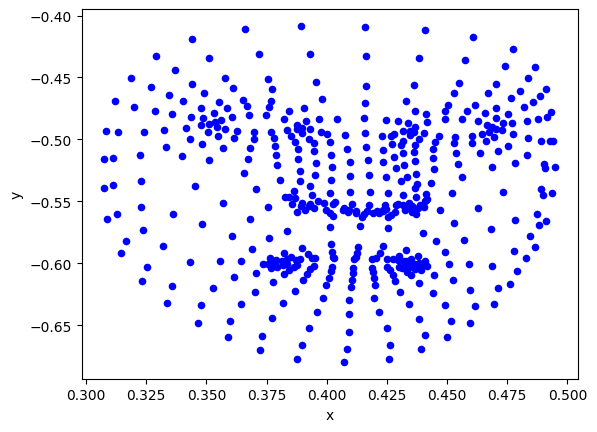

In [235]:
face.plot(x='x',y='y',kind='scatter',color='blue')

In [236]:
# Left hand landmarks

left_hand = pd.DataFrame(columns=['x', 'y', 'z'])

if results.left_hand_landmarks is not None:
    for i, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[i] = [point.x, point.y, point.z]

    left_hand['y'] = -left_hand['y']

<Axes: xlabel='x', ylabel='y'>

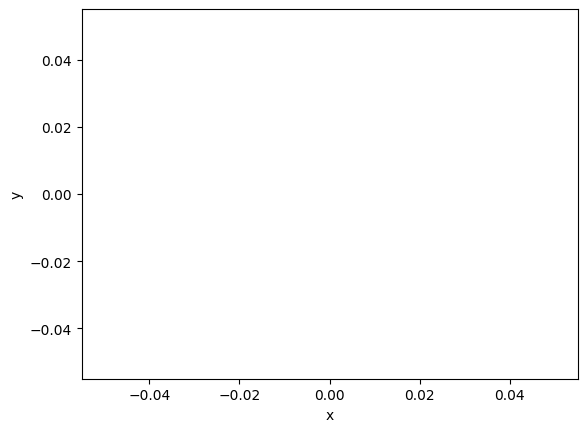

In [237]:
left_hand.plot(x='x',y='y',kind='scatter',color='blue')

In [238]:
#right hand landmarks


right_hand = pd.DataFrame(columns=['x', 'y', 'z'])

if results.right_hand_landmarks is not None:
    for i, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[i] = [point.x, point.y, point.z]

    right_hand['y'] = -right_hand['y']

<Axes: xlabel='x', ylabel='y'>

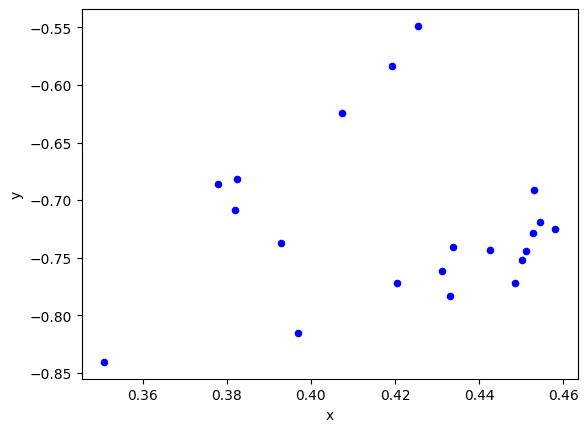

In [239]:
right_hand.plot(x='x',y='y',kind='scatter',color='blue')

In [240]:
#pose landmarks

pose = pd.DataFrame(columns=['x', 'y', 'z'])

if results.pose_landmarks is not None:
    for i, point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i] = [point.x, point.y, point.z]

    pose['y'] = -pose['y']

<Axes: xlabel='x', ylabel='y'>

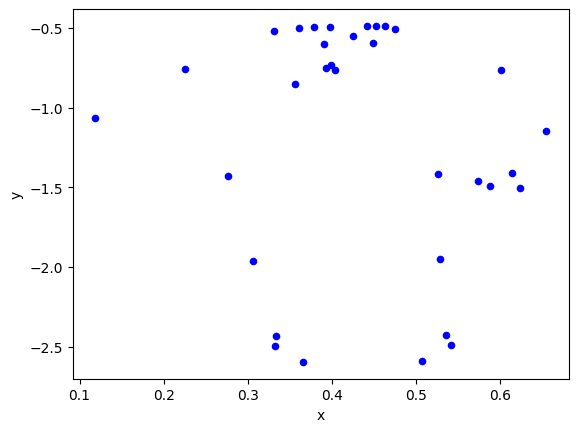

In [241]:
pose.plot(x='x',y='y',kind='scatter',color='blue')

In [242]:
import pandas as pd
import pyarrow

train = pd.read_csv("../asl-signs/train.csv")
pq_file = "../asl-signs/train_landmark_files/16069/10042041.parquet"
xyz = pd.read_parquet(pq_file)

In [243]:
train.query('sequence_id==10042041')

,path,participant_id,sequence_id,sign
101,train_landmark_files/16069/10042041.parquet,16069,10042041,green


In [244]:
xyz['frame'].value_counts()

83     543
136    543
160    543
159    543
158    543
      ... 
115    543
114    543
113    543
112    543
187    543
Name: frame, Length: 105, dtype: int64

In [245]:
#%%
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [246]:
xyz_np = load_relevant_data_subset(pq_file)
xyz_np.shape

(105, 543, 3)

# Make the data taken from cam using mediapipe to the shape we need 

In [247]:
def create_frame_landmark_df(results,frame):
    xyz_skel = (
    xyz[['type', 'landmark_index']]
    .drop_duplicates()
    .reset_index(drop=True)
    .copy()
)

    # initialize empty dataframes
    face = pd.DataFrame()
    pose = pd.DataFrame()
    left_hand = pd.DataFrame()
    right_hand = pd.DataFrame()
    
    # ---- FACE ----
    if results.face_landmarks:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # ---- POSE ----
    if results.pose_landmarks:
        for i, point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # ---- LEFT HAND ----
    if results.left_hand_landmarks:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # ---- RIGHT HAND ----
    if results.right_hand_landmarks:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    
    face = (
    face.reset_index()
    .rename(columns={'index': 'landmark_index'})
    .assign(type='face')
    )

    pose = (
        pose.reset_index()
        .rename(columns={'index': 'landmark_index'})
        .assign(type='pose')
    )

    lefthand = (
        left_hand.reset_index()
        .rename(columns={'index': 'landmark_index'})
        .assign(type='left_hand')
    )
    
    righthand = (
        right_hand.reset_index()
        .rename(columns={'index': 'landmark_index'})
        .assign(type='right_hand')
    )
    landmarks = pd.concat([face,pose,lefthand,righthand]).reset_index(drop=True)
    landmarks = xyz_skel = xyz_skel.merge(landmarks, on=['type', 'landmark_index'], how='left')
    landmarks = landmarks.assign(frame=frame)

    return landmarks

    



In [248]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
landmarks = create_frame_landmark_df(results,0)
landmarks

,type,landmark_index,x,y,z,frame
0,face,0,0.413045,0.586673,-0.023908,0
1,face,1,0.417473,0.552945,-0.043802,0
2,face,2,0.414626,0.562657,-0.024101,0
3,face,3,0.409768,0.518012,-0.032784,0
4,face,4,0.417990,0.542559,-0.046220,0
...,...,...,...,...,...,...
538,right_hand,16,0.431204,0.761387,-0.029797,0
539,right_hand,17,0.392920,0.737150,-0.045360,0
540,right_hand,18,0.451067,0.744298,-0.049858,0
541,right_hand,19,0.448451,0.771788,-0.039668,0


In [250]:
landmarks.reset_index(drop=True).to_parquet("output.parquet")


In [227]:
train['sign'].value_counts()

listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: sign, Length: 250, dtype: int64